Chapter 09

# 一元高斯分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码展示了单变量正态分布随均值 $\mu$ 变化时的概率密度函数 (PDF) 曲线图和 3D 表面图。

1. **单变量正态分布函数定义**：定义一个函数 `uni_normal_pdf(x, mu, sigma)` 来计算单变量正态分布的 PDF，其公式为
   $$
   f_X(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp\left(-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2\right)
   $$
   在此函数中，$\mu$ 为均值，$\sigma$ 为标准差。

2. **设置网格和计算 PDF**：
   - 创建 $X$ 的取值范围，从 $-5$ 到 $5$，间隔为 $0.05$，表示横轴的值。
   - 设置均值 $\mu$ 在 $-2$ 到 $2$ 之间的取值范围，间隔为 $0.2$。
   - 将 $X$ 和 $\mu$ 分别创建为网格数据 `XX` 和 `MM`，利用 `uni_normal_pdf` 函数计算随不同均值 $\mu$ 的 $f_X(x)$ 值。

3. **3D 图形展示**：
   - 使用三维网格线图来展示在不同均值 $\mu$ 下的 $f_X(x)$ 随 $X$ 的变化。图中展示了均值变化时 PDF 的形状如何平移，但形状保持不变。
   - 添加等高线图，将不同均值 $\mu$ 下的 $f_X(x)$ 等高线投影到平面上，从而直观显示 $X$ 和 $\mu$ 的关系。

4. **二维曲线图展示**：
   - 使用多条曲线来展示不同均值 $\mu$ 下的 $f_X(x)$ 变化情况。
   - 每条曲线对应一个特定的均值 $\mu$，表明随着 $\mu$ 的增大，曲线在 $X$ 轴上相应右移。

通过这段代码，可以观察到正态分布在不同均值 $\mu$ 下的平移特性，而方差 $\sigma$ 保持为常量，不影响 PDF 的形状或高度。

这段代码展示了正态分布在不同均值 $\mu$ 下的一维概率密度函数 (PDF) 的变化。首先定义了一个函数计算正态分布的 PDF，然后在不同的 $\mu$ 值下绘制了三维网格图和二维曲线图，用以可视化不同均值对分布的影响。

### 一维正态分布密度函数
正态分布的概率密度函数为：
$$
f_{X}(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm  # 导入颜色映射

## 定义函数：计算正态分布概率密度

In [2]:
def uni_normal_pdf(x, mu, sigma):  # 自定义函数：一维正态分布密度
    coeff = 1 / np.sqrt(2 * np.pi) / sigma  # 计算系数
    z = (x - mu) / sigma  # 计算标准化变量
    f_x = coeff * np.exp(-1/2 * z**2)  # 计算概率密度值
    
    return f_x

## 准备数据

In [3]:
X  = np.arange(-5, 5, 0.05)  # 创建 X 的线性空间
mu = np.arange(-2, 2, 0.2)  # 创建均值的线性空间

In [4]:
XX, MM = np.meshgrid(X, mu)  # 创建网格数据

In [5]:
sigma = 1  # 设置标准差

In [6]:
f_x_varying_mu = uni_normal_pdf(XX, MM, sigma)  # 计算不同均值下的概率密度

## 绘制 3D 网格图

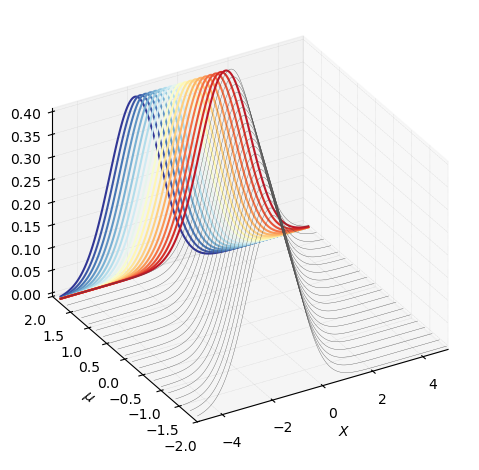

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(XX, MM, f_x_varying_mu, rstride=1, cstride=0,
                  color = [0.3, 0.3, 0.3],
                  linewidth = 0.25)  # 绘制3D网格图

ax.contour(XX, MM, f_x_varying_mu, 
           levels = 20, zdir='y', \
            offset=mu.max(), cmap=cm.RdYlBu_r)  # 绘制投影等高线图

ax.set_xlabel(r'$X$')  # 设置 X 轴标签
ax.set_ylabel(r'$\mu$')  # 设置均值标签
ax.set_zlabel(r'$f_{X}(x)$')  # 设置 Z 轴标签

ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle" : ":"})  # 调整 X 轴网格
ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle" : ":"})  # 调整 Y 轴网格
ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle" : ":"})  # 调整 Z 轴网格

ax.set_xlim(-5, 5)  # 设置 X 轴范围
ax.set_ylim(-2, 2)  # 设置 Y 轴范围
ax.set_proj_type('ortho')
ax.view_init(azim=-120, elev=30)  # 设置视角
plt.tight_layout()  # 调整布局
plt.show()  # 显示图形

## 绘制不同均值下的 2D 曲线图

(0.0, 0.3989422804014327)

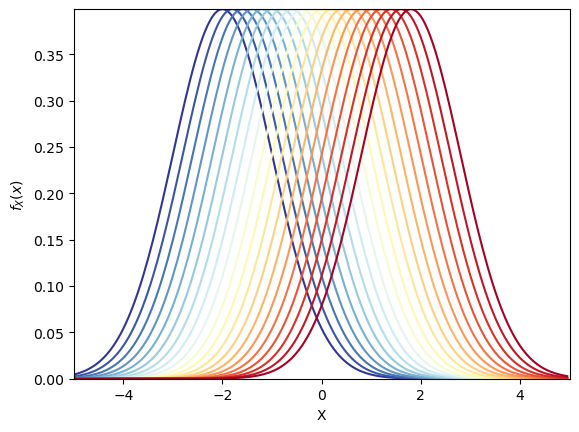

In [8]:
fig, ax = plt.subplots()  # 创建子图

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(mu)))  # 设置颜色渐变

for i in np.linspace(1, len(mu), len(mu)):  # 遍历不同均值
    plt.plot(X, f_x_varying_mu[int(i)-1, :],
             color = colors[int(i)-1])  # 绘制概率密度曲线

plt.xlabel('X')  # 设置 X 轴标签
plt.ylabel(r'$f_{X}(x)$')  # 设置 Y 轴标签
ax.set_xlim(-5, 5)  # 设置 X 轴范围
ax.set_ylim(0, f_x_varying_mu.max())  # 设置 Y 轴范围
